In [1]:
import os
import requests
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
load_dotenv()

True

In [3]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [4]:
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [5]:
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [6]:
#today = pd.Timestamp("2018-01-01", tz="America/New_York").isoformat()
start_date = pd.Timestamp('2018-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-04-30', tz='America/New_York').isoformat()

In [20]:
tickers = ["AMZN",  "DPZ", "MCD",  "SBUX", "WEN", "WMT","YUM", "DRI","EAT", "UAL", "CCL", "NFLX", "GRUB", "UBER"]
#tickers = ["AMZN", "ASO", "BABA", "DIS", "DPZ", "EBAY", "ETSY", "FB", "MCD", "PYPL", "SBUX", "SHOP", "SQ", "TGT", "UBER", "WEN", "WMT", "GRUB", "MACY", "OSTK", "LVMUY", "WSM", "PPRUY","YUM", "SHLDQ", "DRI", "EAT", "NFLX"]
# List:  mcd, 
# algo_returns = algo_data.pct_change().dropna()
# algo_returns.head()
# Combinded returns
##  Plot price activity between 2018 and today
# avg price pre/post pandemic
# loc....
#  quantify (how much did these stocks go up or down)
#  pull in revenue data
#  (Pandemic affect price of stock)
#calculate all returns
#dropna
#
#algo_returns = algo_data.pct_change().dropna()
#algo_returns.head()

#pandas function that calculates corralation overtime of two series of numbers

#retail_stock_returns = closing price.pct_change().dropna()
#retail_stock_returns

In [21]:
timeframe = "1D"
print (timeframe)

1D


In [22]:
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 1000
).df

In [23]:
df_portfolio.index

DatetimeIndex(['2018-08-07 00:00:00-04:00', '2018-08-08 00:00:00-04:00',
               '2018-08-09 00:00:00-04:00', '2018-08-10 00:00:00-04:00',
               '2018-08-13 00:00:00-04:00', '2018-08-14 00:00:00-04:00',
               '2018-08-15 00:00:00-04:00', '2018-08-16 00:00:00-04:00',
               '2018-08-17 00:00:00-04:00', '2018-08-20 00:00:00-04:00',
               ...
               '2021-04-19 00:00:00-04:00', '2021-04-20 00:00:00-04:00',
               '2021-04-21 00:00:00-04:00', '2021-04-22 00:00:00-04:00',
               '2021-04-23 00:00:00-04:00', '2021-04-26 00:00:00-04:00',
               '2021-04-27 00:00:00-04:00', '2021-04-28 00:00:00-04:00',
               '2021-04-29 00:00:00-04:00', '2021-04-30 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='time', length=688, freq=None)

In [24]:
df_portfolio.isnull().sum()

AMZN  open      0
      high      0
      low       0
      close     0
      volume    0
               ..
YUM   open      3
      high      3
      low       3
      close     3
      volume    3
Length: 70, dtype: int64

<AxesSubplot:xlabel='time'>

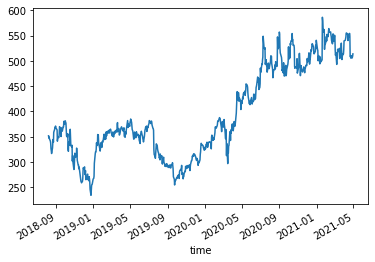

In [25]:
nflx = df_portfolio[('NFLX','close')]
nflx.plot()

<AxesSubplot:xlabel='time'>

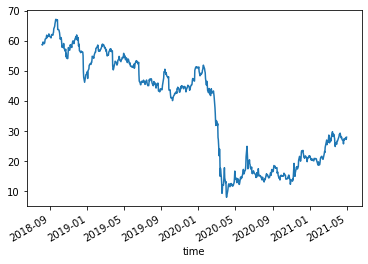

In [26]:
ccl = df_portfolio[('CCL','close')]
ccl.plot()

<AxesSubplot:xlabel='time'>

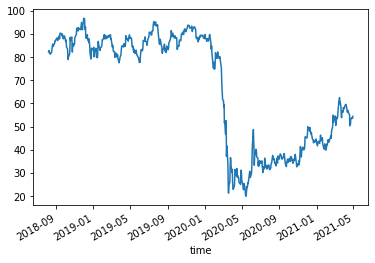

In [27]:
ual = df_portfolio[('UAL','close')]
ual.plot()

<AxesSubplot:xlabel='time'>

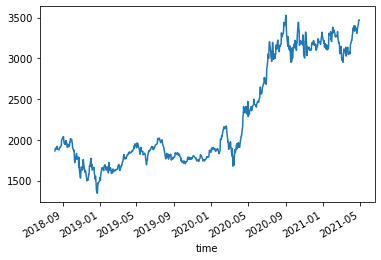

In [28]:
amzn =  df_portfolio[('AMZN','close')]
amzn.plot()

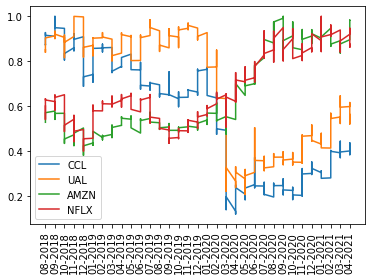

In [29]:
plt.plot(list(map(lambda t: t.strftime('%m-%Y'), ccl.index.to_list())), ccl.to_numpy() / ccl.to_numpy().max(), label="CCL")
plt.plot(list(map(lambda t: t.strftime('%m-%Y'), ual.index.to_list())), ual.to_numpy() / ual.to_numpy().max(), label="UAL")
plt.plot(list(map(lambda t: t.strftime('%m-%Y'), amzn.index.to_list())), amzn.to_numpy() / amzn.to_numpy().max(), label="AMZN")
plt.plot(list(map(lambda t: t.strftime('%m-%Y'), nflx.index.to_list())), nflx.to_numpy() / nflx.to_numpy().max(), label="NFLX")
plt.legend()
plt.xticks(rotation = 90)
plt.show()

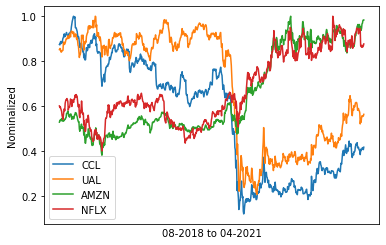

In [30]:
plt.plot(ccl.to_numpy() / ccl.to_numpy().max(), label="CCL")
plt.plot(ual.to_numpy() / ual.to_numpy().max(), label="UAL")
plt.plot(amzn.to_numpy() / amzn.to_numpy().max(), label="AMZN")
plt.plot(nflx.to_numpy() / nflx.to_numpy().max(), label="NFLX")
plt.legend()
plt.ylabel("Nominalized")
plt.xlabel('08-2018 to 04-2021')
plt.xticks([])
plt.show()

#

In [31]:
df_portfolio.dropna()

AMZN                                       \
                              open      high      low    close   volume   
time                                                                      
2019-05-10 00:00:00-04:00  1898.00  1903.790  1856.00  1889.98  5355441   
2019-05-13 00:00:00-04:00  1837.11  1846.535  1818.00  1822.62  5312153   
2019-05-14 00:00:00-04:00  1839.90  1852.440  1815.75  1840.05  4179780   
2019-05-15 00:00:00-04:00  1827.95  1874.427  1823.00  1871.12  4294255   
2019-05-16 00:00:00-04:00  1885.90  1917.510  1882.29  1907.86  4317968   
...                            ...       ...      ...      ...      ...   
2021-04-26 00:00:00-04:00  3350.01  3428.450  3330.94  3408.96  4540005   
2021-04-27 00:00:00-04:00  3443.37  3460.000  3398.01  3418.72  3436951   
2021-04-28 00:00:00-04:00  3433.24  3489.880  3425.00  3461.12  4240027   
2021-04-29 00:00:00-04:00  3503.99  3514.445  3435.00  3471.31  5462247   
2021-04-30 00:00:00-04:00  3526.58  3554.000  3462.50  3470.02  6264077   

                             CCL                                   ...  \
                            open     high    low  close    volume  ...   
time                                                               ...   
2019-05-10 00:00:00-04:00  53.47  54.3900  52.90  54.33   2308210  ...   
2019-05-13 00:00:00-04:00  53.00  53.2556  52.33  52.77   4024605  ...   
2019-05-14 00:00:00-04:00  52.74  54.2500  52.63  53.81   3988299  ...   
2019-05-15 00:00:00-04:00  53.36  53.9500  53.11  53.79   3371372  ...   
2019-05-16 00:00:00-04:00  53.65  54.1800  53.52  53.93   2561173  ...   
...                          ...      ...    ...    ...       ...  ...   
2021-04-26 00:00:00-04:00  27.83  28.5000  27.31  27.55  18550133  ...   
2021-04-27 00:00:00-04:00  27.58  27.8800  27.14  27.81  16025608  ...   
2021-04-28 00:00:00-04:00  27.70  28.2650  27.57  27.80  15812758  ...   
2021-04-29 00:00:00-04:00  28.81  29.1380  27.13  27.21  37648803  ...   
2021-04-30 00:00:00-04:00  27.06  28.0100  26.87  27.95  19097688  ...   

                              WMT                                         YUM  \
                             open     high      low   close    volume    open   
time                                                                            
2019-05-10 00:00:00-04:00   99.76  102.110   99.700  101.96   7361882  100.48   
2019-05-13 00:00:00-04:00  100.45  101.150   99.010   99.87   6663859  100.38   
2019-05-14 00:00:00-04:00  100.14  100.865   99.890  100.32   4753096  100.43   
2019-05-15 00:00:00-04:00  100.20  100.360   99.130   99.90   6000158  100.25   
2019-05-16 00:00:00-04:00  102.83  103.960  100.840  101.27  14509714  101.02   
...                           ...      ...      ...     ...       ...     ...   
2021-04-26 00:00:00-04:00  139.91  140.000  137.640  137.92   6797784  117.95   
2021-04-27 00:00:00-04:00  138.00  138.945  137.550  138.39   4666458  116.04   
2021-04-28 00:00:00-04:00  138.31  138.590  137.865  137.92   4150586  115.50   
2021-04-29 00:00:00-04:00  137.98  140.000  137.900  139.62   5874037  118.00   
2021-04-30 00:00:00-04:00  139.90  139.990  139.110  139.93   4837677  118.92   

                                                                  
                               high       low   close     volume  
time                                                              
2019-05-10 00:00:00-04:00  101.8400  100.2300  101.44  1154953.0  
2019-05-13 00:00:00-04:00  100.7800   99.4200  100.41   955485.0  
2019-05-14 00:00:00-04:00  101.3600  100.4100  100.69  1180513.0  
2019-05-15 00:00:00-04:00  100.8812  100.0157  100.37   880491.0  
2019-05-16 00:00:00-04:00  101.6500  100.5200  100.87  1400716.0  
...                             ...       ...     ...        ...  
2021-04-26 00:00:00-04:00  117.9500  115.3600  115.70  1768391.0  
2021-04-27 00:00:00-04:00  116.5000  115.8000  116.33   884086.0  
2021-04-28 00:00:00-04:00  118.7000  115.5000  117.62  1580936.0  
202

<AxesSubplot:xlabel='time'>

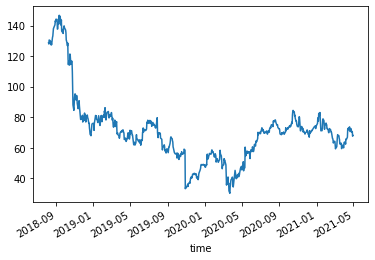

In [32]:
grub = df_portfolio[('GRUB','close')]
grub.plot()

<AxesSubplot:xlabel='time'>

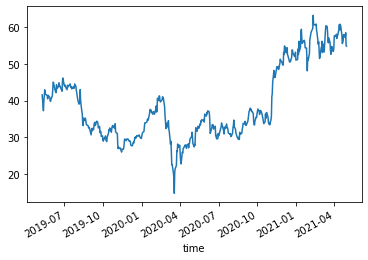

In [33]:
uber = df_portfolio[('UBER','close')]
uber.plot()

In [34]:
closing = pd.DataFrame({
    "AMZN": amzn, "CCL": ccl, "UAL": ual, "NFLX": nflx, "GRUB": grub, "UBER": uber
})
closing.corr()

#since amazon and nflx are closely corrolated
#people will will start going back on cruises and airlines both highly corrolated
#if i see united airlines go up, buy a bunch of carnival cruisline stocks because they are highly corrolated
#if something is good for airlines, probably good for cruise ships too

#if there is uptick in airlines, uptick in cruises
#UAL dropped 80% but has come back to 50% recovery
#AS PANDEMIC ENDS AND THEY BECOME MORE COMFORTABLE GOING IN PUBLIC,  TRAVEL STOCKS WILL BACK UP TO THEIR ORIGINAL PEAKS

,AMZN,CCL,UAL,NFLX,GRUB,UBER
AMZN,1.000000,-0.788786,-0.778093,0.957132,-0.017550,0.552816
CCL,-0.788786,1.000000,0.948660,-0.737488,0.424152,-0.029347
UAL,-0.778093,0.948660,1.000000,-0.773034,0.229211,-0.037167
NFLX,0.957132,-0.737488,-0.773034,1.000000,0.026253,0.587289
GRUB,-0.017550,0.424152,0.229211,0.026253,1.000000,0.570488
UBER,0.552816,-0.029347,-0.037167,0.587289,0.570488,1.000000


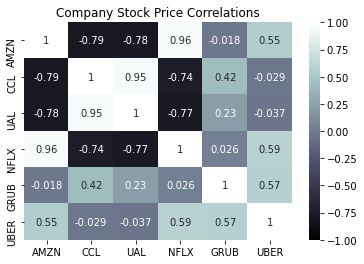

<Figure size 432x288 with 0 Axes>

In [44]:
ax = plt.axes()
sns.heatmap(closing.corr(), ax=ax,vmin=-1, vmax=+1, annot=True, cmap="bone")
ax.set_title("Company Stock Price Correlations")
plt.show()
plt.savefig('Matplotlib_save_plot.png')

In [37]:
closing_price = df_portfolio.xs("close",axis="columns",level=1)
closing_price.dropna()

,AMZN,CCL,DPZ,DRI,EAT,GRUB,MCD,NFLX,SBUX,UAL,UBER,WEN,WMT,YUM
time,,,,,,,,,,,,,,
2019-05-10 00:00:00-04:00,1889.98,54.33,278.36,121.74,42.64,66.600,200.09,360.9325,78.440,84.80,41.5500,18.860,101.96,101.44
2019-05-13 00:00:00-04:00,1822.62,52.77,273.88,120.16,41.47,61.890,199.04,345.1400,76.660,82.05,37.2500,18.650,99.87,100.41
2019-05-14 00:00:00-04:00,1840.05,53.81,272.74,121.02,41.33,62.545,198.05,345.5542,77.055,83.44,39.9597,18.490,100.32,100.69
2019-05-15 00:00:00-04:00,1871.12,53.79,276.63,121.03,41.34,63.590,199.11,354.9900,77.770,82.36,41.1900,18.660,99.90,100.37
2019-05-16 00:00:00-04:00,1907.86,53.93,277.98,118.96,40.61,62.800,199.99,359.2400,78.900,82.59,42.9300,18.730,101.27,100.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26 00:00:00-04:00,3408.96,27.55,400.48,142.18,65.34,70.840,232.31,510.3700,115.920,53.80,57.6200,22.215,137.92,115.70
2021-04-27 00:00:00-04:00,3418.72,27.81,400.82,142.63,65.66,70.060,235.01,505.5400,116.200,53.48,57.1400,22.270,138.39,116.33
2021-04-28 00:00:00-04:00,3461.12,27.80,404.38,143.87,67.79,70.450,232.47,506.5800,112.410,53.54,58.4250,22.270,137.92,117.62


In [38]:
closing_price.to_csv('../../data/cleandata/closing_prices.csv')


In [98]:
# List:  mcd, 
# algo_returns = algo_data.pct_change().dropna()
# algo_returns.head()
# Combinded returns
#calculate all returns
#dropna
#
#algo_returns = algo_data.pct_change().dropna()
#algo_returns.head()


retail_stock_returns = closing_price.pct_change().dropna()
retail_stock_returns

,AMZN,DPZ,DRI,EAT,MCD,SBUX,WEN,WMT,YUM
time,,,,,,,,,
2018-08-08 00:00:00-04:00,0.012788,0.034052,-0.000637,0.007639,0.018263,-0.009796,0.014101,0.003007,0.007378
2018-08-09 00:00:00-04:00,0.006154,0.015472,-0.004186,0.007358,0.002140,0.006984,0.028969,-0.011438,0.009766
2018-08-10 00:00:00-04:00,-0.006391,-0.000206,0.000548,-0.022023,-0.003517,-0.007706,-0.006194,0.013143,0.002539
2018-08-13 00:00:00-04:00,0.005117,-0.009370,-0.001370,-0.008261,-0.003466,0.006018,-0.016714,-0.005987,-0.006632
2018-08-14 00:00:00-04:00,0.012771,-0.003811,0.016738,-0.015062,0.015810,0.015052,0.028522,0.013352,0.008619
...,...,...,...,...,...,...,...,...,...
2021-04-26 00:00:00-04:00,0.020488,0.006940,-0.012433,-0.035572,-0.009677,-0.013699,-0.017470,-0.014012,-0.017159
2021-04-27 00:00:00-04:00,0.002485,0.000824,0.003165,0.004897,0.011622,0.002415,0.002476,0.003408,0.005099
2021-04-28 00:00:00-04:00,0.012784,0.008907,0.008694,0.032440,-0.010808,-0.032616,0.000000,-0.003396,0.011437


In [41]:
#cumulative_returns = (1 + retail_stock_returns)

cumulative_returns = (1 + retail_stock_returns).cumprod()

cumulative_returns.plot()

NameError: name 'retail_stock_returns' is not defined

In [76]:
cumulative_std = cumulative_returns.std()
cumulative_std



AMZN    0.344056
DPZ     0.211872
DRI     0.186903
EAT     0.289992
MCD     0.122471
SBUX    0.292264
WEN     0.141266
WMT     0.192341
YUM     0.133565
dtype: float64

In [77]:
cumulative_returns.shape

(687, 9)

In [78]:
annualized_std = cumulative_returns.std() * np.sqrt(252)
annualized_std



AMZN    5.461720
DPZ     3.363356
DRI     2.967000
EAT     4.603480
MCD     1.944169
SBUX    4.639542
WEN     2.242532
WMT     3.053320
YUM     2.120273
dtype: float64

C:\Users\QLE\anaconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


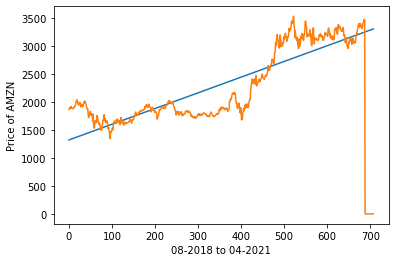

In [42]:
### Linear Example

from sklearn.linear_model import LinearRegression
import datetime as dt
import numpy as np

y = closing_price["AMZN"].values.reshape(-1, 1)
X = np.arange(closing_price.shape[0]).reshape(-1, 1)

reg = LinearRegression().fit(X,y)

future = X[-20:] + 20
regpred1 = reg.predict(X)
regpred2= reg.predict(future)

prediction = list(regpred1) + list(regpred2)
xaxis = list(X) + list(future)

plt.plot(xaxis,prediction)
plt.plot(xaxis,list(y)+20*[0])
plt.ylabel("Price of AMZN")
plt.xlabel('08-2018 to 04-2021')
plt.show()

In [43]:
### Support Vector Machines Example
#from sklearn import svm

svm_regression_model = svm.SVR(kernel="poly")
svm_regression_model.fit(X,y)

svmpredict1 = svm.predict(X)
svmpredict2 = svm.predict(future)

NameError: name 'svm' is not defined